# Unsupervised Clustering Algorithms #

This customer segmentation dataset was found on Kaggle, which includes the customers' age, gender, annual income, and spending score. We will be performing exploratory data analysis on this data, and then implementing clustering algorithms like K-Means, Mean Shift, DBSCAN, and Hierarchal Clustering.

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth

In [17]:
# Loading the dataset
##################################
df = pd.read_csv(r'C:\Users\lalde\Downloads\Mall_Customers.csv')


df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis ###

In [30]:
# 1. Basic information about the dataset
print(df.info())
print("\nDataset shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Dataset shape: (200, 5)


In [24]:
# 2. Summary statistics
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [26]:
# 3. Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [28]:
# 4. Unique values in categorical columns
print(df['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


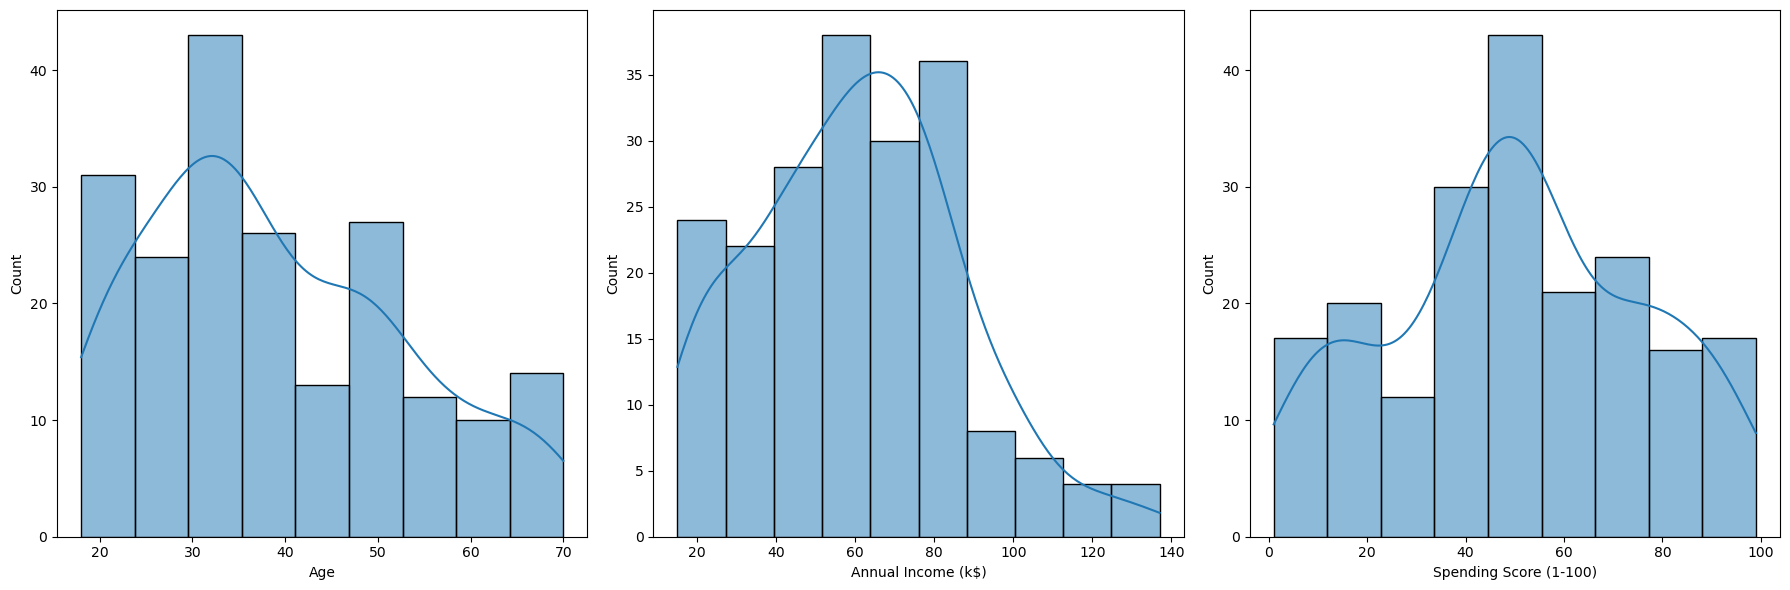

In [36]:
# 5. Distribution of numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['Age'], kde=True, ax=axes[0])
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1])
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2])
plt.tight_layout()
plt.show()

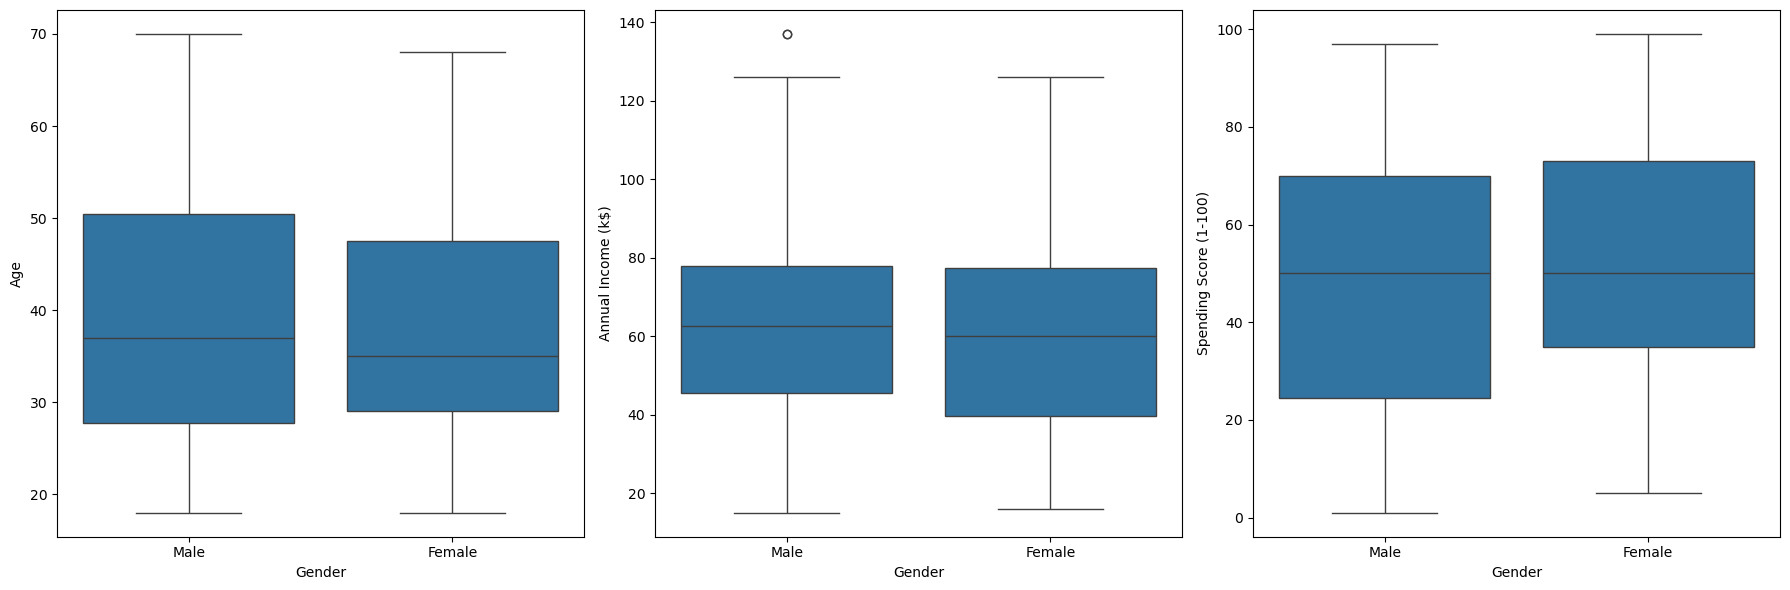

In [38]:
# 7. Box plots for numerical variables by gender
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Gender', y='Age', data=df, ax=axes[0])
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, ax=axes[1])
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axes[2])
plt.tight_layout()
plt.show()

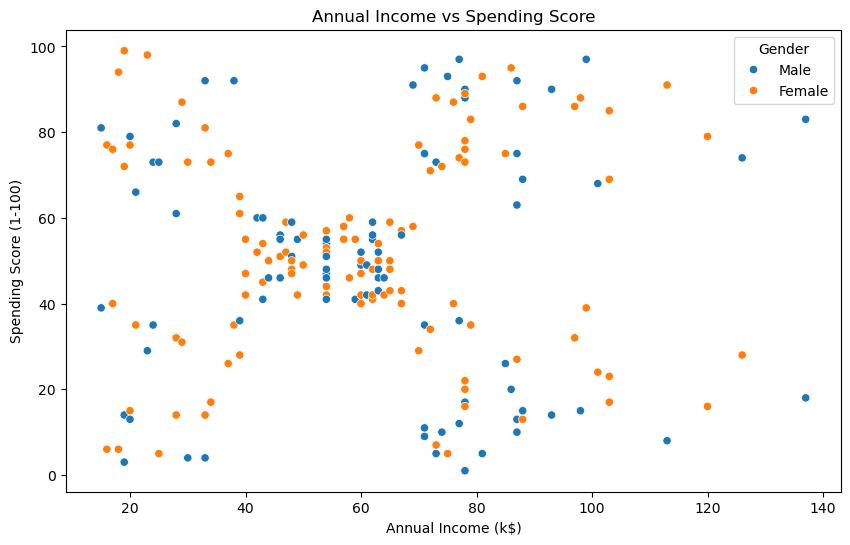

In [40]:
# 8. Scatter plot: Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()

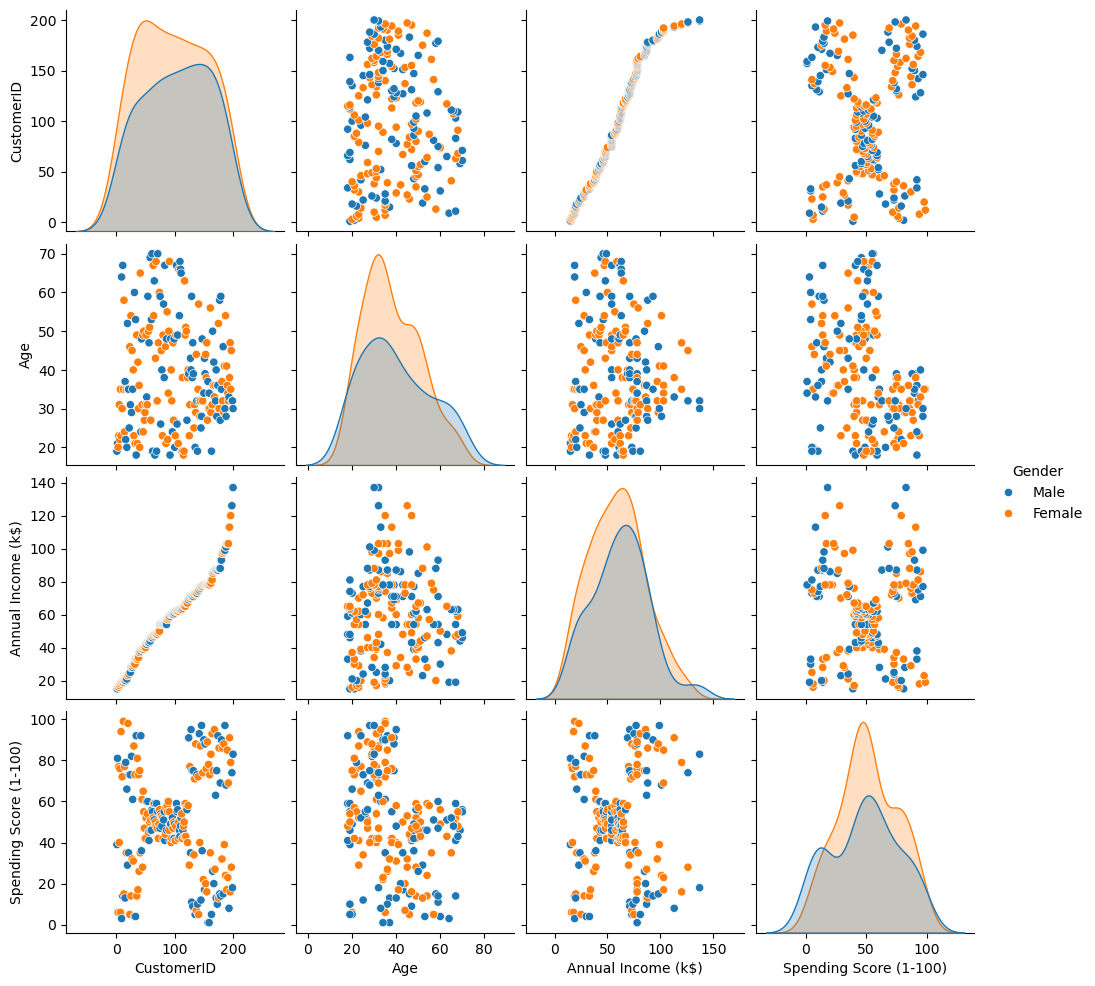

In [42]:
# 9. Pairplot
sns.pairplot(df, hue='Gender')
plt.show()

### Normalization ###

In [45]:
# Select the features for normalization
features_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
df_normalized = df.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Display the first few rows of the normalized dataset
print(df_normalized.head())

# Verify the normalization
print("\nMean of normalized features:")
print(df_normalized[features_to_normalize].mean())
print("\nStandard deviation of normalized features:")
print(df_normalized[features_to_normalize].std())

   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male -1.424569           -1.738999               -0.434801
1           2    Male -1.281035           -1.738999                1.195704
2           3  Female -1.352802           -1.700830               -1.715913
3           4  Female -1.137502           -1.700830                1.040418
4           5  Female -0.563369           -1.662660               -0.395980

Mean of normalized features:
Age                      -1.021405e-16
Annual Income (k$)       -2.131628e-16
Spending Score (1-100)   -1.465494e-16
dtype: float64

Standard deviation of normalized features:
Age                       1.002509
Annual Income (k$)        1.002509
Spending Score (1-100)    1.002509
dtype: float64


### K Means Clustering ###

In [48]:
# Select features for clustering
X = df_normalized[features_to_normalize].values

In [52]:
# Determine the optimal number of clusters using the elbow method
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

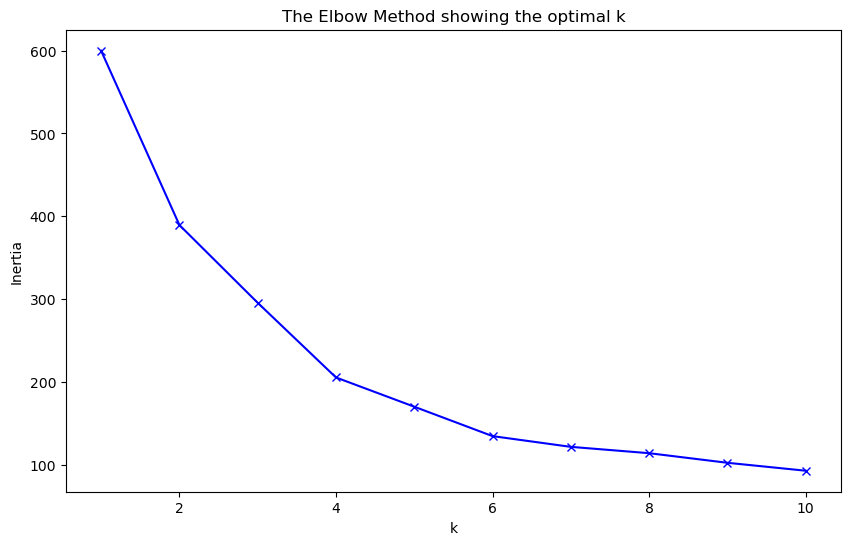

In [54]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
# Based on the elbow curve, choose the optimal number of clusters
optimal_k = 3  # You may need to adjust this based on the elbow curve

In [58]:
# Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

C:\Users\lalde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [60]:
# Add the cluster labels to the dataframe
df_normalized['Cluster'] = cluster_labels

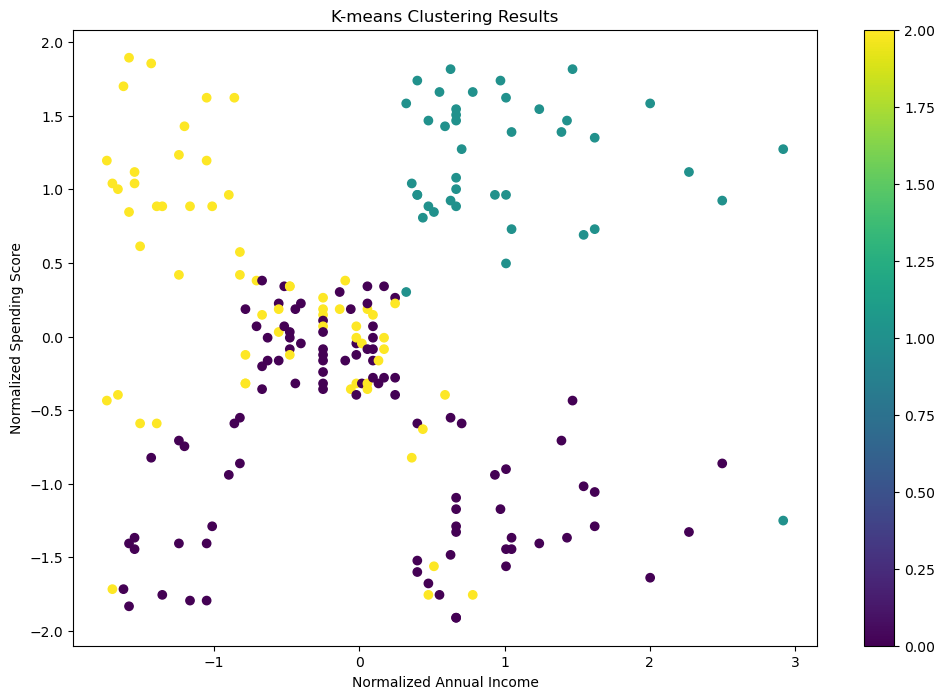

In [62]:
# Visualize the clusters (using the first two features)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X[:, 1], X[:, 2], c=cluster_labels, cmap='viridis')
plt.xlabel('Normalized Annual Income')
plt.ylabel('Normalized Spending Score')
plt.title('K-means Clustering Results')
plt.colorbar(scatter)
plt.show()

In [64]:
# Print cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i} center: Age={center[0]:.2f}, Annual Income={center[1]:.2f}, Spending Score={center[2]:.2f}")

Cluster 0 center: Age=50.41, Annual Income=60.47, Spending Score=33.34
Cluster 1 center: Age=32.85, Annual Income=87.34, Spending Score=79.98
Cluster 2 center: Age=25.14, Annual Income=43.27, Spending Score=56.51


In [66]:
# Analyze clusters
for i in range(optimal_k):
    cluster_data = df_normalized[df_normalized['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data[features_to_normalize + ['Gender']].describe())
    print(f"Gender distribution:\n{cluster_data['Gender'].value_counts(normalize=True)}")


Cluster 0:
             Age  Annual Income (k$)  Spending Score (1-100)
count  96.000000           96.000000               96.000000
mean    0.829354           -0.003483               -0.654386
std     0.742731            0.904780                0.688492
min    -0.993969           -1.624491               -1.910021
25%     0.297832           -0.632086               -1.337403
50%     0.728432           -0.021375               -0.493034
75%     1.392274            0.637048               -0.085407
max     2.235532            2.497807                0.380451
Gender distribution:
Gender
Female    0.552083
Male      0.447917
Name: proportion, dtype: float64

Cluster 1:
             Age  Annual Income (k$)  Spending Score (1-100)
count  41.000000           41.000000               41.000000
mean   -0.430338            1.022233                1.155936
std     0.273544            0.686499                0.543397
min    -0.850435            0.322150               -1.250054
25%    -0.635135       

Cluster 0 is the largest cluster with 96 customers.
The data indicates that these are older customers with average income and low spending habits.

Cluster 1 is the smallest cluster with 41 customers. The data indicates that this cluster represents younger, affluent customers with high spending habits.

Cluster 2 has 63 customers and represents younger customers with lower incomes and moderate spending habits. It is likely that these customers are students or entry-level professionals.

### Mean Shift ###

In [115]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import MinMaxScaler

In [117]:
# Use MinMaxScaler instead of StandardScaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [119]:
# Select features for clustering
X = df_normalized[features_to_normalize].values


Bandwidth 1: 0.2515
Number of estimated clusters: 10


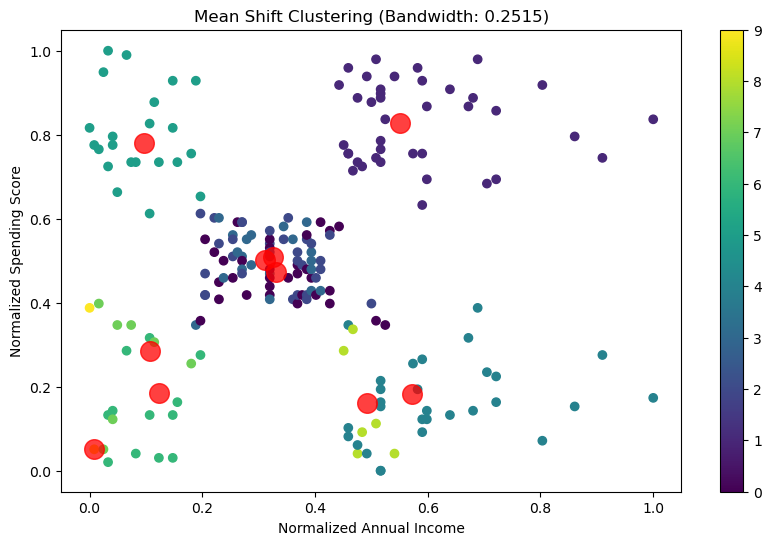

Cluster 0 center: Age=48.42, Annual Income=55.32, Spending Score=47.29
Cluster 1 center: Age=32.57, Annual Income=82.26, Spending Score=82.17
Cluster 2 center: Age=25.18, Annual Income=54.79, Spending Score=50.76
Cluster 3 center: Age=62.08, Annual Income=53.00, Spending Score=50.08
Cluster 4 center: Age=41.71, Annual Income=84.76, Spending Score=19.00
Cluster 5 center: Age=24.10, Annual Income=26.75, Spending Score=77.45
Cluster 6 center: Age=49.67, Annual Income=30.08, Spending Score=19.08
Cluster 7 center: Age=36.00, Annual Income=28.00, Spending Score=29.00
Cluster 8 center: Age=23.57, Annual Income=75.00, Spending Score=16.71
Cluster 9 center: Age=20.00, Annual Income=16.00, Spending Score=6.00

Cluster 0:
             Age  Annual Income (k$)  Spending Score (1-100)
count  32.000000           32.000000               32.000000
mean    0.563101            0.339652                0.470663
std     0.092452            0.085587                0.069920
min     0.384615            0.19672

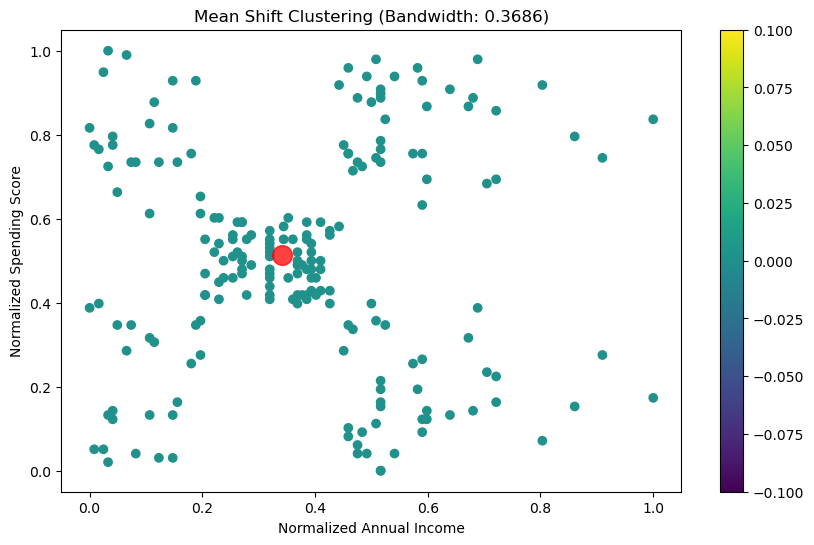


Bandwidth 3: 0.5000
Number of estimated clusters: 1


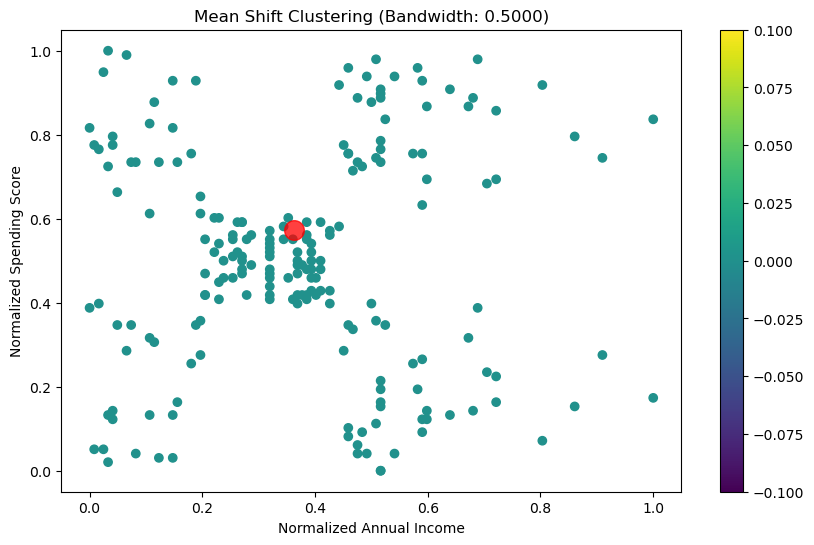


Bandwidth 4: 1.0000
Number of estimated clusters: 1


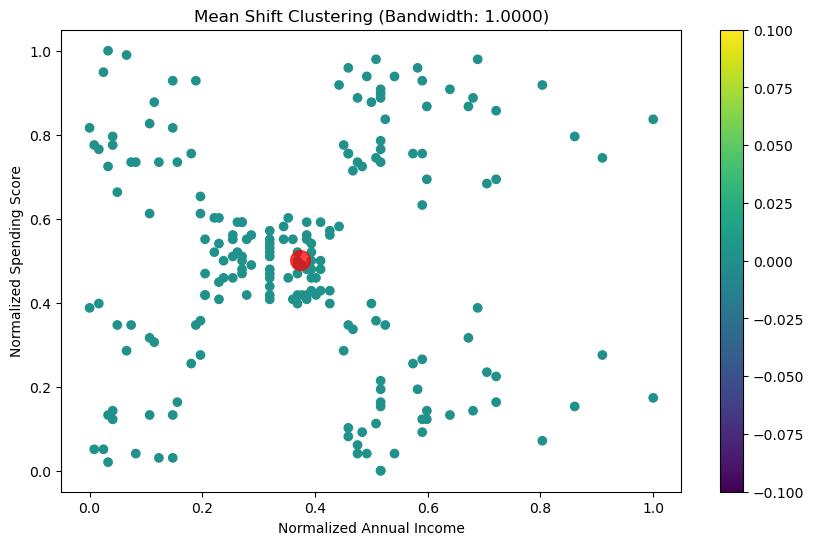

In [133]:
# Try different bandwidth estimation methods
bandwidths = [
    estimate_bandwidth(X, quantile=0.1, n_samples=len(X)),
    estimate_bandwidth(X, quantile=0.2, n_samples=len(X)),
    0.5,  # Manual small bandwidth
    1.0   # Manual larger bandwidth
]

for i, bandwidth in enumerate(bandwidths):
    # Apply MeanShift
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    # Get the number of clusters
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)

    print(f"\nBandwidth {i+1}: {bandwidth:.4f}")
    print(f"Number of estimated clusters: {n_clusters_}")

    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], c='red', s=200, alpha=0.75)
    plt.xlabel('Normalized Annual Income')
    plt.ylabel('Normalized Spending Score')
    plt.title(f'Mean Shift Clustering (Bandwidth: {bandwidth:.4f})')
    plt.colorbar(scatter)
    plt.show()

    # If we have more than one cluster, print cluster info
    if n_clusters_ > 1:
        # Add the cluster labels to the dataframe
        df_normalized['Cluster'] = labels

        # Print cluster centers
        cluster_centers_original = scaler.inverse_transform(cluster_centers)
        for j, center in enumerate(cluster_centers_original):
            print(f"Cluster {j} center: Age={center[0]:.2f}, Annual Income={center[1]:.2f}, Spending Score={center[2]:.2f}")

        # Analyze clusters
        for j in range(n_clusters_):
            cluster_data = df_normalized[df_normalized['Cluster'] == j]
            print(f"\nCluster {j}:")
            print(cluster_data[features_to_normalize + ['Gender']].describe())
            print(f"Gender distribution:\n{cluster_data['Gender'].value_counts(normalize=True)}")

After modifying our mean shift algorithm with different bandwidths, bandwidth 1 gave us 10 clusters.

Cluster 1 indicates young, affluent spenders.
Cluster 4 indicates middle-aged, high income spenders
Cluster 5 indicates young, low income, high spenders.
Cluster 3 is the oldest group, with average spending score.

Clusters 7, 8, and 9 are very small which indicates niche customer groups.

### Agglomerative Clustering ###

In [137]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [139]:
# Load and normalize the data
df = pd.read_csv(r'C:\Users\lalde\Downloads\Mall_Customers.csv')
features_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [141]:
# Select features for clustering
X = df_normalized[features_to_normalize].values

In [143]:
# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

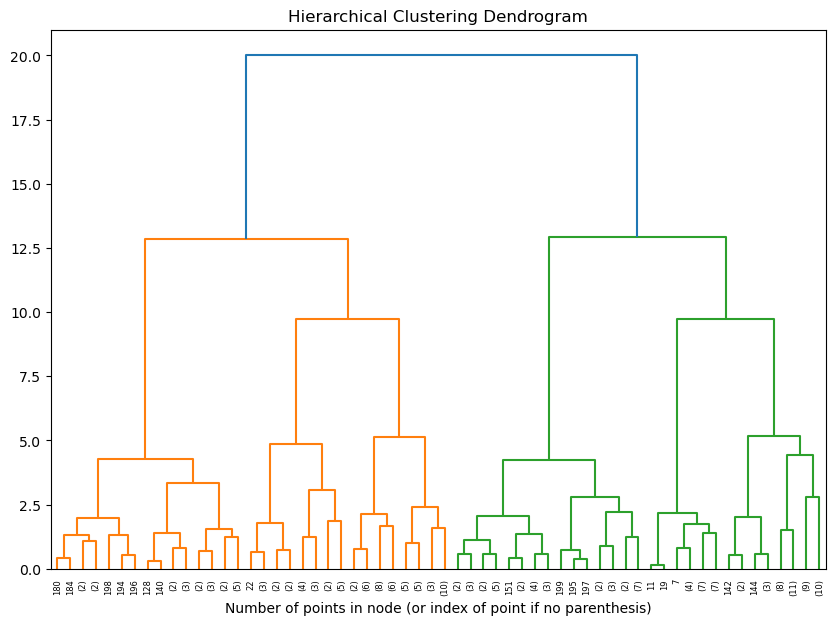

In [145]:
# Plot the dendrogram to help choose the number of clusters
plt.figure(figsize=(10, 7))
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plot_dendrogram(model, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.show()

In [147]:
# Based on the dendrogram, choose the number of clusters
n_clusters = 5  # You can adjust this based on the dendrogram

In [149]:
# Perform hierarchical clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters)
labels = hierarchical_cluster.fit_predict(X)

In [151]:
# Add the cluster labels to the dataframe
df_normalized['Cluster'] = labels


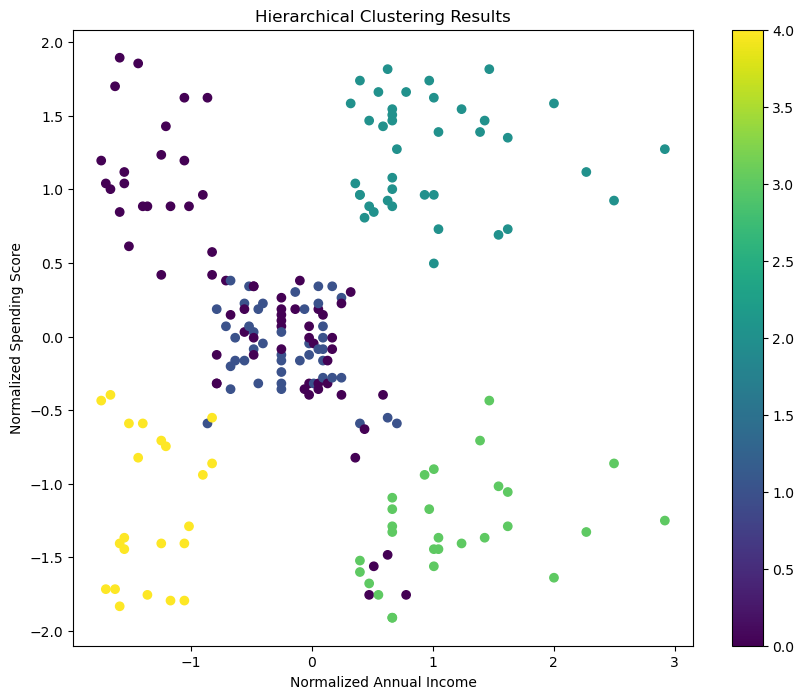

In [153]:
# Visualize the clusters (using the first two features)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='viridis')
plt.xlabel('Normalized Annual Income')
plt.ylabel('Normalized Spending Score')
plt.title('Hierarchical Clustering Results')
plt.colorbar(scatter)
plt.show()

In [155]:
# Analyze clusters
for i in range(n_clusters):
    cluster_data = df_normalized[df_normalized['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data[features_to_normalize + ['Gender']].describe())
    print(f"Gender distribution:\n{cluster_data['Gender'].value_counts(normalize=True)}")


Cluster 0:
             Age  Annual Income (k$)  Spending Score (1-100)
count  66.000000           66.000000               66.000000
mean   -0.881969           -0.503698                0.255752
std     0.505453            0.699581                0.800820
min    -1.496335           -1.738999               -1.754735
25%    -1.281035           -1.051949               -0.153345
50%    -1.029852           -0.479408                0.186343
75%    -0.563369            0.054964                0.885132
max     0.441365            0.780183                1.894492
Gender distribution:
Gender
Female    0.606061
Male      0.393939
Name: proportion, dtype: float64

Cluster 1:
             Age  Annual Income (k$)  Spending Score (1-100)
count  45.000000           45.000000               45.000000
mean    1.259505           -0.201195               -0.071604
std     0.600911            0.375363                0.266681
min     0.297832           -0.861102               -0.590088
25%     0.728432       

In [157]:
# Print cluster centers
for i in range(n_clusters):
    cluster_center = df_normalized[df_normalized['Cluster'] == i][features_to_normalize].mean()
    print(f"\nCluster {i} center:")
    print(scaler.inverse_transform([cluster_center])[0])


Cluster 0 center:
[26.56060606 47.36363636 56.78787879]

Cluster 1 center:
[56.4        55.28888889 48.35555556]

Cluster 2 center:
[32.69230769 86.53846154 82.12820513]

Cluster 3 center:
[43.89285714 91.28571429 16.67857143]

Cluster 4 center:
[44.31818182 25.77272727 20.27272727]


Cluster 1 has 45 customers and represents older customers with moderate income and spending habits.
Cluster 2 has 39 customers and represents young, affluent customers with high spending habits.
Cluster 3 has 28 customers and represents middle-aged, high income individuals with very low spending habits.
Cluster 4 has 22 customers and represents middle-aged, low income customers with low spending habits.

In [160]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [162]:
# Load and normalize the data
df = pd.read_csv(r'C:\Users\lalde\Downloads\Mall_Customers.csv')
features_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [164]:
# Select features for clustering
X = df_normalized[features_to_normalize].values

In [166]:
# Function to plot k-distance graph
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.show()

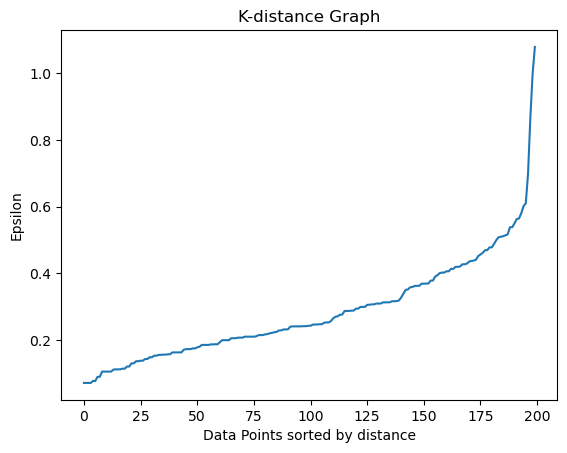

In [168]:
# Plot k-distance graph to help choose epsilon
plot_k_distance_graph(X, 5)

In [172]:
# Based on the k-distance graph, choose an appropriate epsilon
epsilon = 0.5  # You may need to adjust this value

In [174]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=5)
labels = dbscan.fit_predict(X)

In [176]:
# Add the cluster labels to the dataframe
df_normalized['Cluster'] = labels

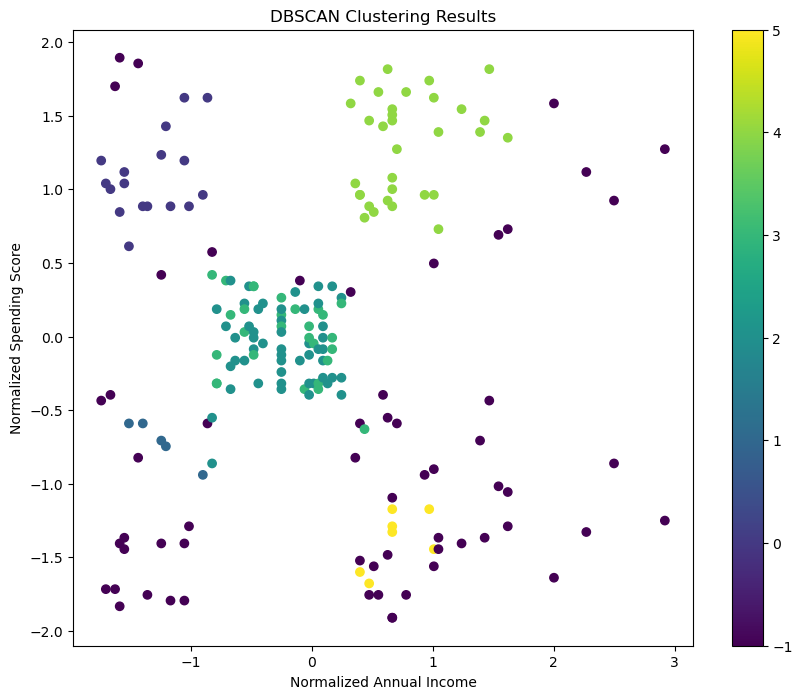

In [178]:
# Visualize the clusters (using the first two features)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='viridis')
plt.xlabel('Normalized Annual Income')
plt.ylabel('Normalized Spending Score')
plt.title('DBSCAN Clustering Results')
plt.colorbar(scatter)
plt.show()

In [180]:
# Get the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 6
Number of noise points: 60


In [182]:
# Analyze clusters
for i in set(labels):
    if i != -1:
        cluster_data = df_normalized[df_normalized['Cluster'] == i]
        print(f"\nCluster {i}:")
        print(cluster_data[features_to_normalize + ['Gender']].describe())
        print(f"Gender distribution:\n{cluster_data['Gender'].value_counts(normalize=True)}")
    else:
        noise_data = df_normalized[df_normalized['Cluster'] == -1]
        print("\nNoise points:")
        print(noise_data[features_to_normalize + ['Gender']].describe())
        print(f"Gender distribution:\n{noise_data['Gender'].value_counts(normalize=True)}")


Cluster 0:
             Age  Annual Income (k$)  Spending Score (1-100)
count  17.000000           17.000000               17.000000
mean   -1.082622           -1.325871                1.086090
std     0.284283            0.287615                0.274933
min    -1.496335           -1.738999                0.613381
25%    -1.281035           -1.548152                0.885132
50%    -1.137502           -1.357305                1.040418
75%    -0.993969           -1.051949                1.195704
max    -0.563369           -0.861102                1.622741
Gender distribution:
Gender
Female    0.529412
Male      0.470588
Name: proportion, dtype: float64

Cluster 1:
            Age  Annual Income (k$)  Spending Score (1-100)
count  5.000000            5.000000                5.000000
mean  -0.046648           -1.250430               -0.714317
std    0.310344            0.231232                0.143692
min   -0.276302           -1.509983               -0.939482
25%   -0.276302           -1

In [184]:
# Print cluster centers
for i in set(labels):
    if i != -1:
        cluster_center = df_normalized[df_normalized['Cluster'] == i][features_to_normalize].mean()
        print(f"\nCluster {i} center:")
        print(scaler.inverse_transform([cluster_center])[0])


Cluster 0 center:
[23.76470588 25.82352941 78.17647059]

Cluster 1 center:
[38.2 27.8 31.8]

Cluster 2 center:
[53.66666667 54.15686275 48.41176471]

Cluster 3 center:
[24.10714286 54.32142857 50.46428571]

Cluster 4 center:
[32.75  80.875 83.625]

Cluster 5 center:
[43.85714286 78.71428571 14.57142857]


After performing DBSCAN, we are given the following clusters:

Cluster 1 has 5 customers. This cluster is middle-aged, low income, and low spending score.

Cluster 2 has 51 customers and represents older customers with moderate income and average spending habits.

Cluster 3 has 28 customers and represents young customers with moderate income and average spending habits.

Cluster 4 has 32 customers and represents young and middle-aged affluent customers with high spending habits.

Cluster 5 has 7 customers and represents middle-aged, high income individuals with very low spending habits.

There are 60 noise points that do not fit well into any cluster. This represents a diverse group of customers which possibly includes outliers and unique customer profiles.